In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(" Libraries loaded successfully!")

 Libraries loaded successfully!


In [3]:
# Load dataset
df = pd.read_csv('/content/sample_data/blogs.csv', encoding='latin-1', names=['text', 'category'])

In [4]:
# Clean the invalid 'Labels'
df = df[df['category'] != 'Labels'].reset_index(drop=True)

In [5]:
print("Dataset cleaned. Shape:", df.shape)
print("\n First few rows:")
print(df.head())
print("\n Category distribution:")
print(df['category'].value_counts())

Dataset cleaned. Shape: (2000, 2)

 First few rows:
                                                text     category
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

 Category distribution:
category
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.p

In [6]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = re.findall(r'\b[a-zA-Z]{3,}\b', text)
    stop_words = {'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'i',
                  'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at',
                  'this', 'but', 'his', 'by', 'from', 'they', 'she', 'or', 'an', 'will'}
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [7]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [8]:
print("\n✨ Sample preprocessed text:")
sample_text = df['clean_text'].iloc[1]
print(sample_text[:200] + "..." if len(sample_text) > 200 else sample_text)


✨ Sample preprocessed text:
newsgroups altatheism path cantaloupesrvcscmueducrabapplesrvcscmuedubbandrewcmuedunewsseicmueducisohiostateeduzaphodmpsohiostateedumoeksuksueduosuunxuccokstateeduconstellationdarksideokcforumosrheedub...


In [9]:
#Prepare data for modeling
valid_categories = df['category'].value_counts()
valid_cats = valid_categories[valid_categories >= 5].index
df_clean = df[df['category'].isin(valid_cats)].reset_index(drop=True)

In [10]:
X = df_clean['clean_text']
y = df_clean['category']

In [11]:
print(f"\n🎯 Training on {len(df_clean)} samples with {len(valid_cats)} categories")


🎯 Training on 2000 samples with 20 categories


In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Naive BayesPipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [14]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [15]:
print("\n MODEL PERFORMANCE:")
print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


 MODEL PERFORMANCE:
 Accuracy: 0.8825

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.75      0.75        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.90      0.95      0.93        20
comp.sys.ibm.pc.hardware       0.68      0.75      0.71        20
   comp.sys.mac.hardware       0.95      0.90      0.92        20
          comp.windows.x       0.94      0.85      0.89        20
            misc.forsale       1.00      0.90      0.95        20
               rec.autos       0.95      0.95      0.95        20
         rec.motorcycles       0.91      1.00      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       0.86      0.90      0.88        20
            

In [16]:
# Sentiment Analysis
def simple_sentiment(text):
    if pd.isna(text) or text == "":
        return 'neutral'
    text = str(text).lower()
    pos_words = set(['good', 'great', 'excellent', 'amazing', 'love', 'happy', 'wonderful',
                     'best', 'awesome', 'perfect', 'nice', 'beautiful', 'fantastic'])
    neg_words = set(['bad', 'terrible', 'hate', 'worst', 'horrible', 'awful', 'sad',
                     'angry', 'stupid', 'useless', 'trash', 'pathetic'])

    words = re.findall(r'\b[a-zA-Z]{3,}\b', text)
    pos_count = sum(1 for word in words if word in pos_words)
    neg_count = sum(1 for word in words if word in neg_words)

    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

In [17]:
df['sentiment'] = df['text'].apply(simple_sentiment)

In [18]:
print("\n Sentiment distribution:")
print(df['sentiment'].value_counts())


 Sentiment distribution:
sentiment
neutral     1173
positive     701
negative     126
Name: count, dtype: int64


In [19]:
# Sentiment by Category
top_cats = df['category'].value_counts().head(10).index
df_top = df[df['category'].isin(top_cats)]
sentiment_by_category = df_top.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

In [20]:
print("\n Sentiment by Top Categories:")
print(sentiment_by_category)


 Sentiment by Top Categories:
sentiment                 negative  neutral  positive
category                                             
alt.atheism                      5       58        37
comp.graphics                    4       60        36
comp.os.ms-windows.misc          3       72        25
comp.sys.ibm.pc.hardware         4       63        33
comp.sys.mac.hardware            4       71        25
comp.windows.x                   3       72        25
misc.forsale                     0       53        47
rec.autos                        5       54        41
rec.motorcycles                  9       52        39
rec.sport.baseball               6       51        43


Text(0, 0.5, 'Count')

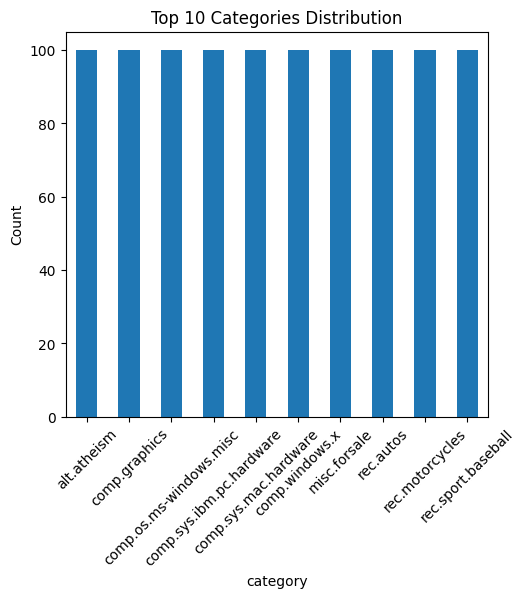

In [21]:
# Plot 1: Category Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

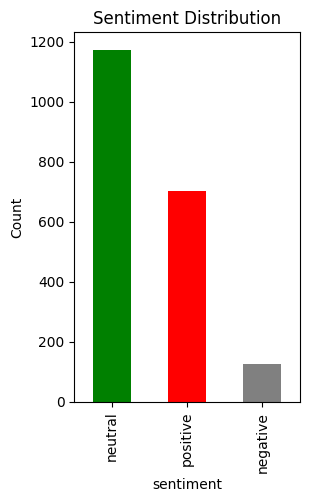

In [22]:
# Plot 2: Sentiment Distribution
plt.subplot(1, 2, 2)
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')

In [23]:
plt.tight_layout()
plt.savefig('category_sentiment_dist.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

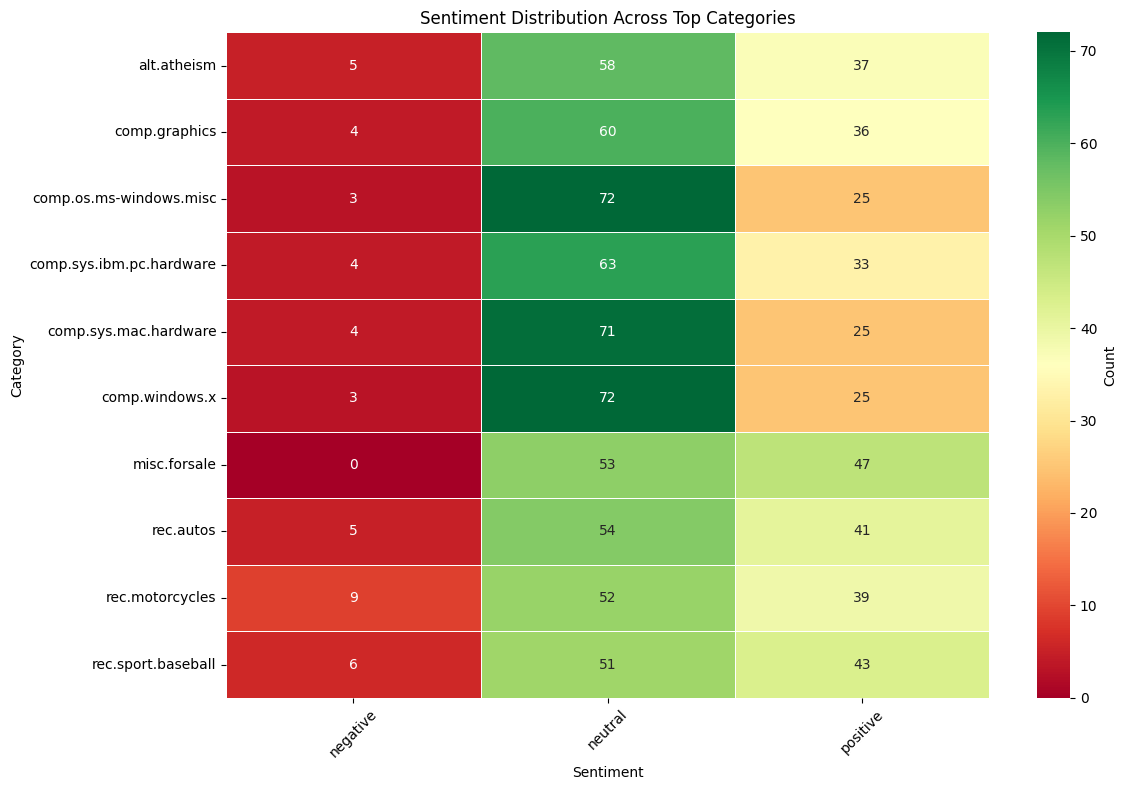

In [24]:
# Plot 3: Sentiment Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_by_category, annot=True, fmt='d', cmap='RdYlGn',
            cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.title('Sentiment Distribution Across Top Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Metrics Table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-Score (weighted)'],
    'Score': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ]
})

In [28]:
print("\n Evaluation Metrics Summary:")
print(metrics_df.round(4))


 Evaluation Metrics Summary:
                 Metric   Score
0              Accuracy  0.8825
1  Precision (weighted)  0.8890
2     Recall (weighted)  0.8825
3   F1-Score (weighted)  0.8821


In [29]:
print(" All tasks done: Preprocessing ✓ Classification ✓ Sentiment ✓ Evaluation ✓ Plots ✓")
print(f" Files saved: sentiment_heatmap.png, category_sentiment_dist.png")
print(f" Try prediction: pipeline.predict(['i love this product'])[0] = '{pipeline.predict(['i love this product'])[0]}'")

 All tasks done: Preprocessing ✓ Classification ✓ Sentiment ✓ Evaluation ✓ Plots ✓
 Files saved: sentiment_heatmap.png, category_sentiment_dist.png
 Try prediction: pipeline.predict(['i love this product'])[0] = 'comp.os.ms-windows.misc'
